In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Load Data

In [2]:
dataset = pd.read_csv("../datasets/BestBooksEverClean.csv")
dataset

FileNotFoundError: [Errno 2] No such file or directory: './BestBooksEverClean.csv'

## From String list, return the list of genres

In [53]:
def genres_to_list(genres: str) -> list:
  list_of_genres = genres.removeprefix('[').removesuffix(']').split(', ')
  return list(map(lambda s: s[1:][:-1], list_of_genres))

In [54]:
dataset["genres"] = dataset["genres"].apply(genres_to_list)
type(dataset['genres'].iloc[0])

list

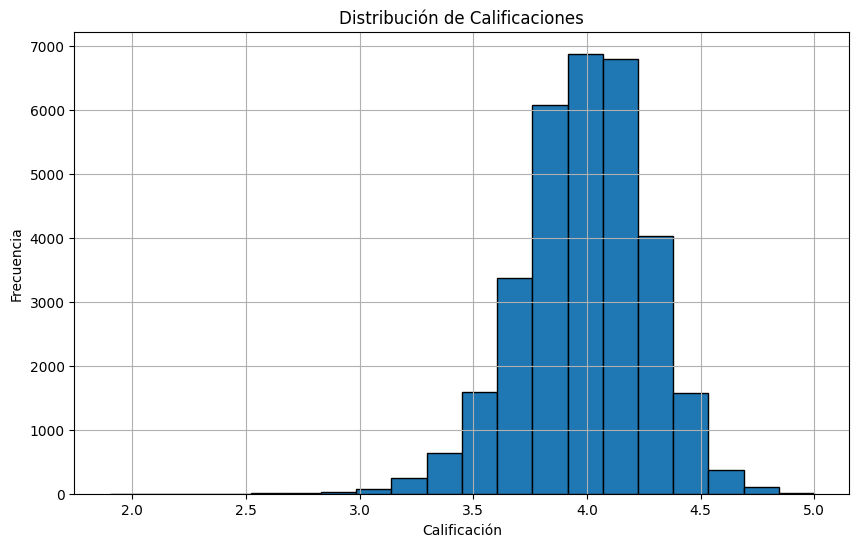

In [55]:
plt.figure(figsize=(10, 6))
dataset['rating'].hist(bins=20, edgecolor='black')
plt.title('Distribución de Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

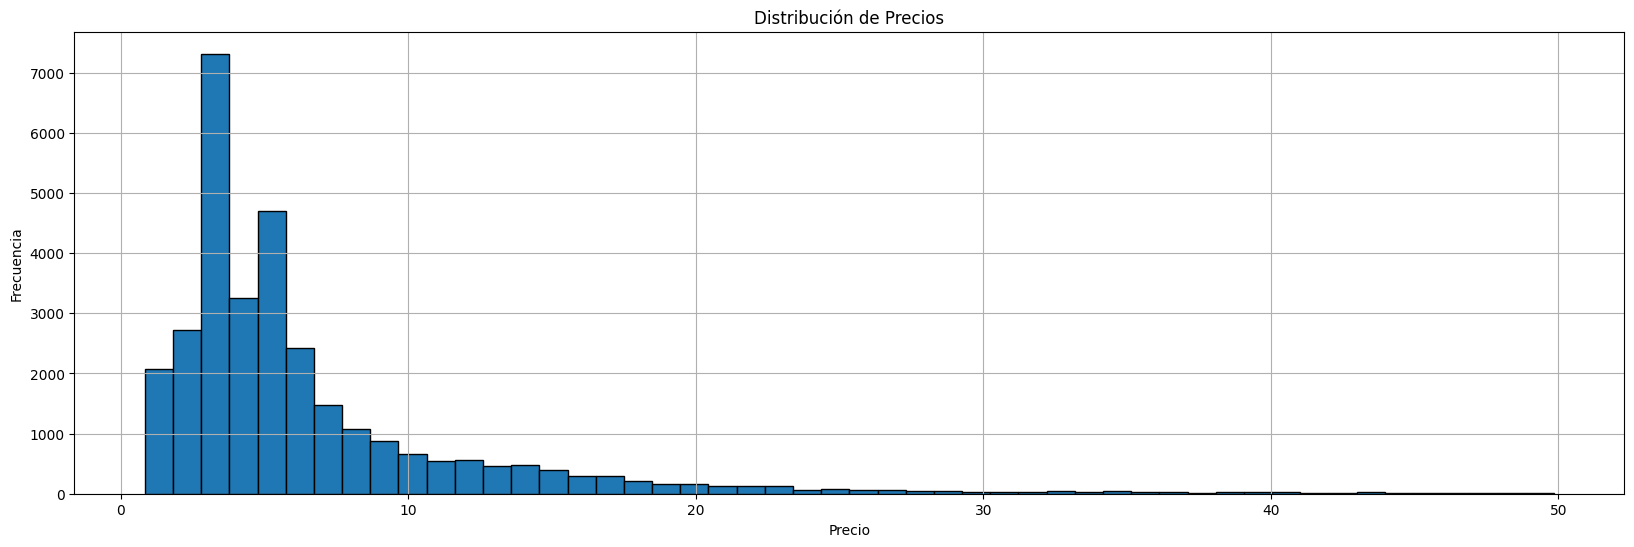

In [74]:
plt.figure(figsize=(20, 6))
dataset[dataset['price'].astype(float) < 50]['price'].hist(bins=50, edgecolor='black')
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

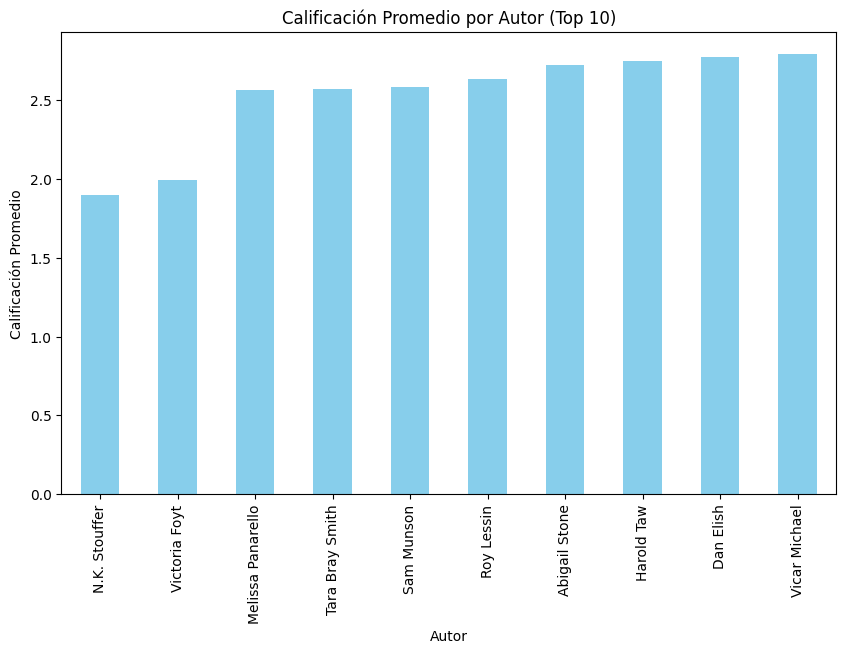

In [57]:
average_rating_by_author = dataset.groupby('author')['rating'].mean().sort_values(ascending=True).head(10)

plt.figure(figsize=(10, 6))
average_rating_by_author.plot(kind='bar', color='skyblue')
plt.title('Calificación Promedio por Autor (Top 10)')
plt.xlabel('Autor')
plt.ylabel('Calificación Promedio')
plt.show()

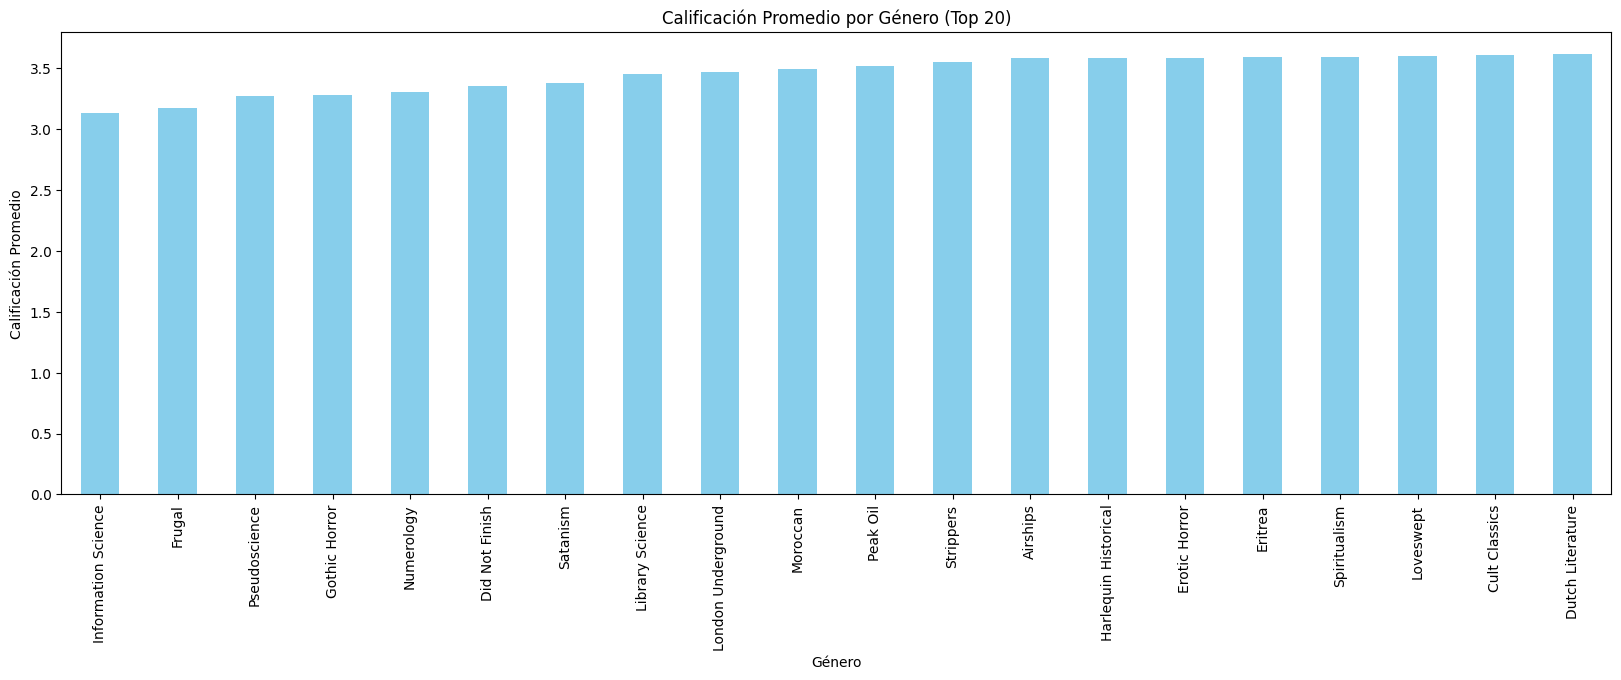

In [58]:
# Explode the genres into individual rows
df_exploded = dataset.explode('genres')

# Calculate average rating by genre
average_rating_by_genre = df_exploded.groupby('genres')['rating'].mean().sort_values(ascending=True).head(20)

plt.figure(figsize=(20, 6))
average_rating_by_genre.plot(kind='bar', color='skyblue')
plt.title('Calificación Promedio por Género (Top 20)')
plt.xlabel('Género')
plt.ylabel('Calificación Promedio')
plt.show()

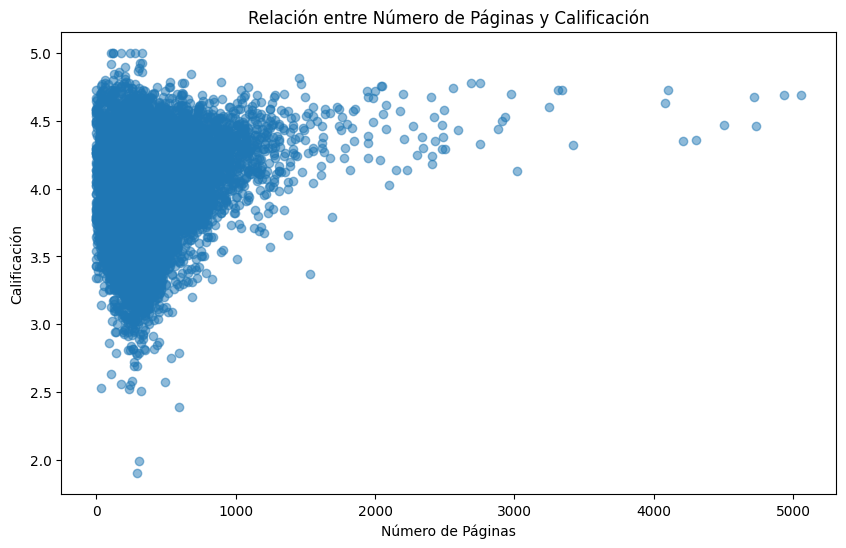

In [81]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset[dataset['pages'].astype(float) < 6000]['pages'], dataset[dataset['pages'].astype(float) < 6000]['rating'], alpha=0.5)
plt.title('Relación entre Número de Páginas y Calificación')
plt.xlabel('Número de Páginas')
plt.ylabel('Calificación')
plt.show()

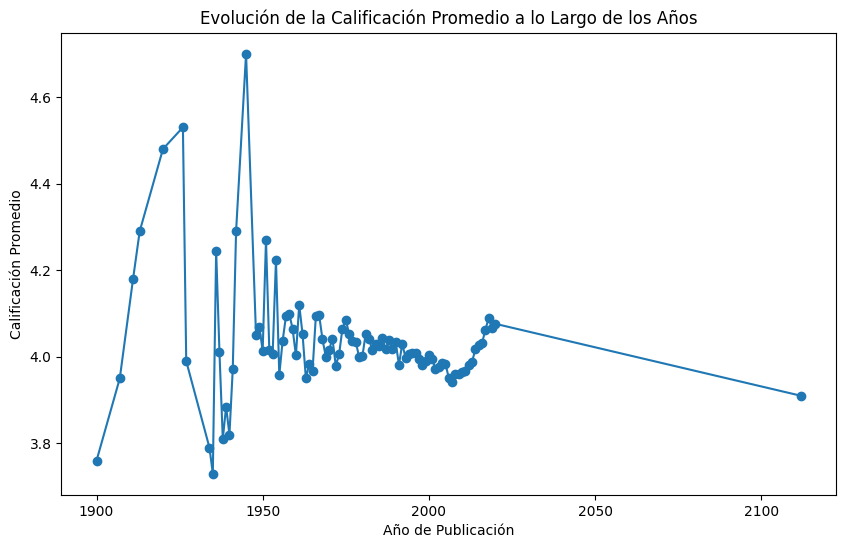

In [60]:
average_rating_by_year = dataset.groupby('publishYear')['rating'].mean()

plt.figure(figsize=(10, 6))
average_rating_by_year.plot(kind='line', marker='o')
plt.title('Evolución de la Calificación Promedio a lo Largo de los Años')
plt.xlabel('Año de Publicación')
plt.ylabel('Calificación Promedio')
plt.show()

In [61]:
dataset[dataset['publishYear'] > 2100]

,title,series,author,genres,pages,publishDate,publishYear,rating,likedPercent,price
25476,Atom Heart John Beloved,standalone,Luke Hartwell,"[M M Romance, Young Adult, Gay, LGBT, Coming O...",278,Expected publication: October 26th 2112,2112,3.91,88.0,35.43


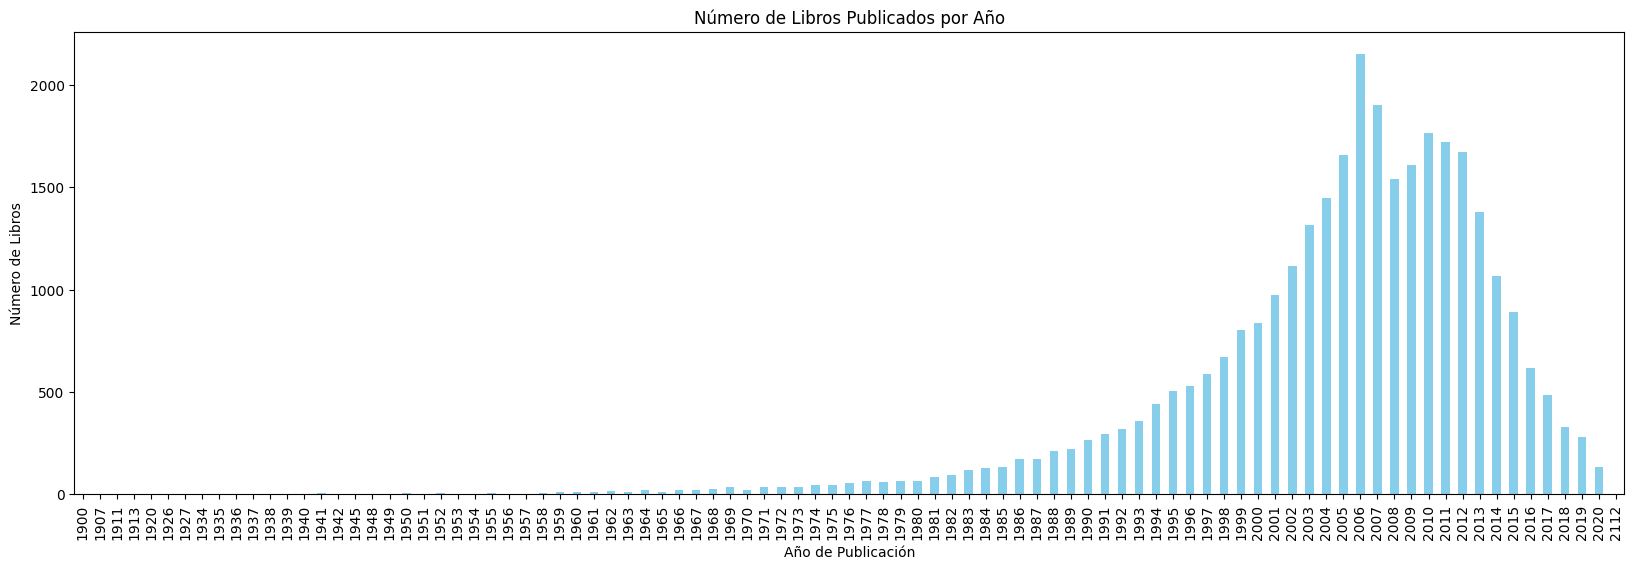

In [62]:
books_per_year = dataset['publishYear'].value_counts().sort_index()

plt.figure(figsize=(20, 6))
books_per_year.plot(kind='bar', color='skyblue')
plt.title('Número de Libros Publicados por Año')
plt.xlabel('Año de Publicación')
plt.ylabel('Número de Libros')
plt.show()

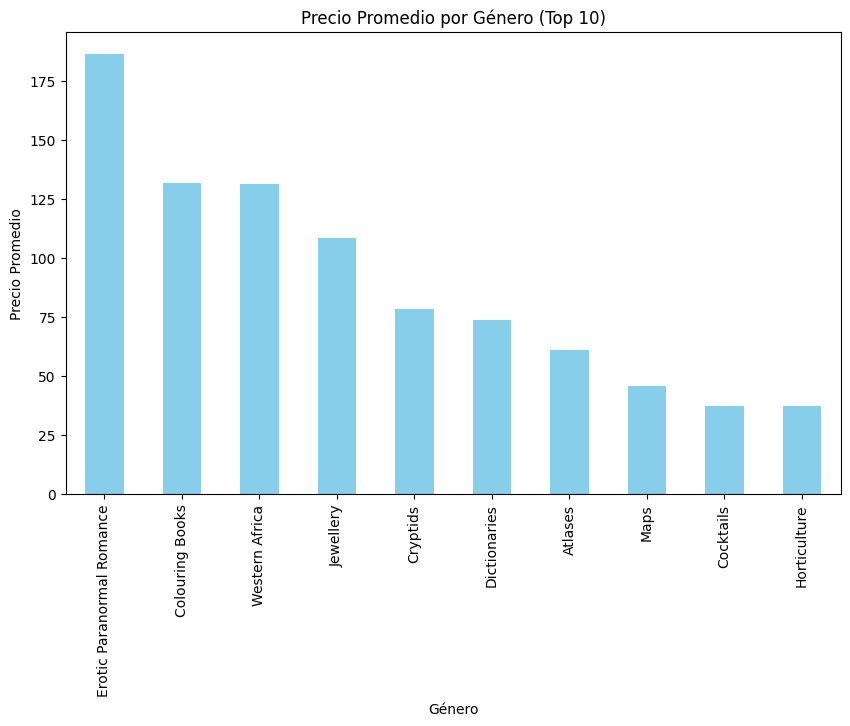

In [63]:
average_price_by_genre = df_exploded.groupby('genres')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
average_price_by_genre.plot(kind='bar', color='skyblue')
plt.title('Precio Promedio por Género (Top 10)')
plt.xlabel('Género')
plt.ylabel('Precio Promedio')
plt.show()

In [64]:
dataset[dataset['genres'].apply(lambda x: 'Martial Arts' in x)]

,title,series,author,genres,pages,publishDate,publishYear,rating,likedPercent,price
1247,Zen in the Martial Arts,standalone,Joe Hyams,"[Martial Arts, Philosophy, Nonfiction, Zen, Bu...",135,June 1st 1982,1982,4.17,96.0,2.42
1303,Aikido and the Dynamic Sphere: An Illustrated ...,standalone,Adele Westbrook,"[Martial Arts, Nonfiction, Sports, Health, Jap...",384,July 1st 2001,2001,4.21,96.0,4.48
2575,A Book of Five Rings: The Classic Guide to Str...,standalone,Miyamoto Musashi,"[Philosophy, Nonfiction, Classics, Martial Art...",192,May 28th 1988,1988,4.05,94.0,6.24
2955,Zen in the Art of Archery,standalone,Eugen Herrigel,"[Philosophy, Nonfiction, Buddhism, Zen, Spirit...",81,1999,1999,3.99,93.0,5.42
3283,Musashi,Musashi,Eiji Yoshikawa,"[Fiction, Historical Fiction, Japan, Classics,...",970,July 14th 1995,1995,4.46,98.0,17.75
4568,The Art of Peace,standalone,Morihei Ueshiba,"[Philosophy, Martial Arts, Nonfiction, Spiritu...",186,March 1st 2007,2007,4.23,96.0,7.21
6295,I Am Jackie Chan: My Life in Action,standalone,Jackie Chan,"[Biography, Nonfiction, Autobiography, Memoir,...",416,June 28th 1999,1999,4.20,97.0,5.37
12090,Tao of Jeet Kune Do,standalone,Bruce Lee,"[Martial Arts, Philosophy, Nonfiction, Biograp...",208,October 1st 1975,1975,4.36,97.0,7.93
17407,Samurai: The World of the Warrior,standalone,Stephen Turnbull,"[History, Japan, Nonfiction, Japanese Literatu...",224,2006,2006,3.92,95.0,3.99
17485,Iron and Silk,standalone,Mark Salzman,"[China, Nonfiction, Memoir, Travel, Martial Ar...",224,October 12th 1987,1987,3.96,95.0,2.82


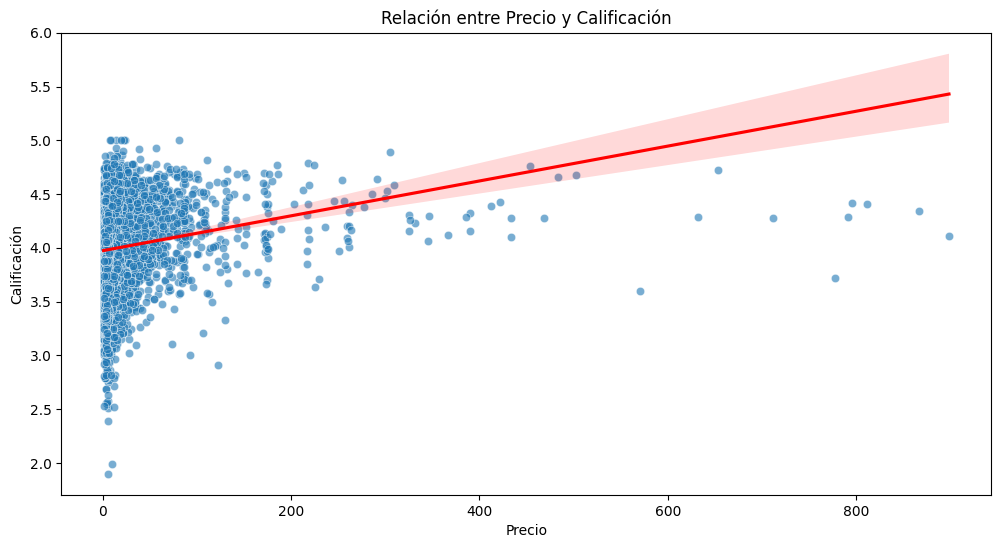

In [84]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='rating', data=dataset, alpha=0.6)
sns.regplot(x='price', y='rating', data=dataset, scatter=False, color='red')
plt.title('Relación entre Precio y Calificación')
plt.xlabel('Precio')
plt.ylabel('Calificación')
plt.show()